# Regresión Lineal

La regresión lineal es un algoritmo de aprendizaje supervisado que se utiliza en Machine Learning y por lo tanto en Inteligencia Artificial. Es uno de los algoritmos más sencillos de entender pues se basa en "dibujar una recta" que nos indica la tendencia de un conjunto de datos. De este modo, a través de esta tendencia, es posible la predicción de comportamientos a través de las características de entrada de un determinado modelo. 

Si trabajamos en Linux, habrá que instalar la herramienta scikit-learn. **Scikit-Learn** es una de las librerías gratuitas para Python de IA. Cuenta con algoritmos de clasificación, regresión, clustering y reducción de dimensionalidad. Además, presenta la compatibilidad con otras librerías de Python como NumPy, SciPy y matplotlib.

A continuación vamos a entrenar un modelo que responde a una muestra tal que:

<img src="ImagenRL.jpg">

Como puedes imaginar y=x1+2x2+3x3. Lo que queremos es que nuestro modelo de regresión lineal averigüe esos pesos de modo que sea capaz de predecir la salida "y" de acuerdo a unos valores de "x1, x2, x3" pero sin saber esa fórmula. Vamos a darles 100 muestras en las que 100 valores de x1, x2, x3 darán 100 valores de y.

In [4]:
from random import randint

Rango_de_X = 1000
Numero_de_Muestras = 100
ArrayX = list()
ArrayY = list()

for i in range(Numero_de_Muestras):
    a = randint(0, Rango_de_X)
    b = randint(0, Rango_de_X)
    c = randint(0, Rango_de_X)
    op = a + (2*b) + (3*c)
    ArrayX.append([a, b, c])
    ArrayY.append(op)


Ahora después, hacemos uso de la librería scikit-learn y entrenamos nuestro modelo:

In [5]:
from sklearn.linear_model import LinearRegression
predictor = LinearRegression(n_jobs=-1)
predictor.fit(X=ArrayX, y=ArrayY)

LinearRegression(n_jobs=-1)

Y ya podemos predecir cualquier combinación de x1, x2, x3, por ejemplo [10, 20, 30] que según nuestra ecuación desconocida por el modelo, debería dar 140. Veremos qué dice el modelo:



In [6]:
MuestraX = [[10, 20, 30]]
salida = predictor.predict(X=MuestraX)
coeficientes= predictor.coef_
print('Salida: {}\nCoeficientes : {}'.format(salida, coeficientes))

Salida: [140.]
Coeficientes : [1. 2. 3.]


## Predición de las emisiones de CO2 de un coche

Cargamos la base de datos o dataset y mostramos información

Filas y columnas del archivo cars.csv
(36, 5)
Primeras 10 filas
          Car       Model  Volume  Weight  CO2
0      Toyoty        Aygo    1000     790   99
1  Mitsubishi  Space Star    1200    1160   95
2       Skoda      Citigo    1000     929   95
3        Fiat         500     900     865   90
4        Mini      Cooper    1500    1140  105
5          VW         Up!    1000     929  105
6       Skoda       Fabia    1400    1109   90
7    Mercedes     A-Class    1500    1365   92
8        Ford      Fiesta    1500    1112   98
9        Audi          A1    1600    1150   99
Estadísticas
            Volume       Weight         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000


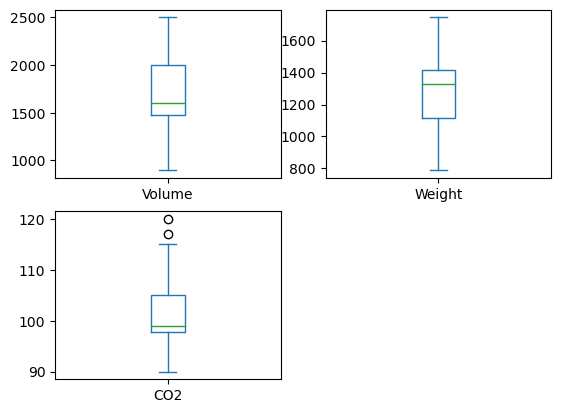

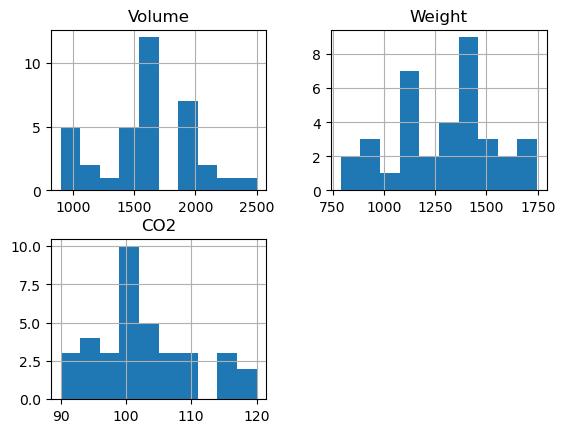

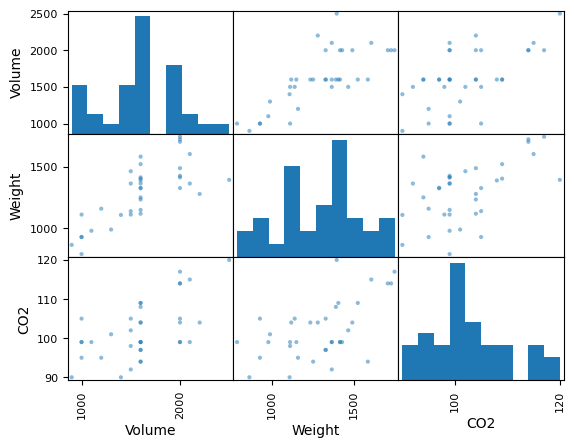

In [8]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

#Le indicamos ruta/nombre. En este caso está en la misma carpeta

url = "cars.csv"

#Cargamos el archivo en la variable dataset

dataset = read_csv(url)

#Imprimimos algunas características

print("Filas y columnas del archivo cars.csv")
print(dataset.shape)
print("Primeras 10 filas")
print(dataset.head(10))
print("Estadísticas")
print(dataset.describe())

#Mostramos algunas gráficas

dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()
dataset.hist()
pyplot.show()
scatter_matrix(dataset)
pyplot.show()

A continuación entrenamos el modelo de Regresión Lineal ya conocido y averiguamos el valor de un coche de 2300kg y 1300cm3.

In [10]:
#Definimos las entradas y salidas

ArrayX = dataset[['Volume', 'Weight']]

ArrayY = dataset['CO2']

#Entrenamos el modelo

modelo = LinearRegression()

modelo.fit(ArrayX.values, ArrayY.values)

#Por último, predecimos algún comportamiento

predeccirCO2 = modelo.predict([[2300, 1300]])

print(predeccirCO2)

[107.46304306]
